<a href="https://colab.research.google.com/github/ErigoLee/Titantic/blob/main/Titantic_final_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install and Import Necessary Package**

In [ ]:
%%capture
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install sklearn

In [ ]:
import pandas as pd ## Pandas is a library used to analyze and manipulate data.
import seaborn as sns ## Seaborn is a library used to visualize data.
import matplotlib.pyplot as plt ## matplotlib.pyplot is a library used to visualize data.
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# **Input file**
Upload titanic.csv in Google Colab

Before running the code, you need to upload titanic.csv to the files area in Google Colab.

This URL is for the "titanic.csv" file.

URL: https://drive.google.com/file/d/1r61Q-fj1MBua5SUgQYatEWFY3dCRK81L/view?usp=sharing

# **Show DataSet**

In this area, we examine the features of the attributes in the database.

For example, you can see the value, column, and dtype of each attribute in database.

In [ ]:
# Set up pandas to display all columns without truncation
##{PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked}
dataset = pd.read_csv('/content/titanic.csv') ## file read

##Adjust pandas display settings
dataset.head(3) ## Display the top 3 rows of data
pd.set_option('display.max_rows', None) ## All columns
print(dataset.head(3))
##Display information about the dataset - each column
dataset.info()
print(dataset.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         8

# **Visualization**


**Bar graph**

Based on the dataset, you can see the bar graph according to the attributes.

You can see the grap based on survival and death values according to sex.

-> You can see that the survival rate of females is higher than that of males.

In [ ]:
def show_bar(feature):
    # Column showing the number of survivors by feature
    survived = dataset[dataset["Survived"] == 1][feature].value_counts()
    # Colum showing the number of deaths by feature
    dead = dataset[dataset["Survived"] == 0][feature].value_counts()

    ## a new DataFrame based on the survived and dead data
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True)
    ##display chart
    plt.show()
    print(df)

Sex
female    233
male      109
Name: count, dtype: int64
Sex
male      468
female     81
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64


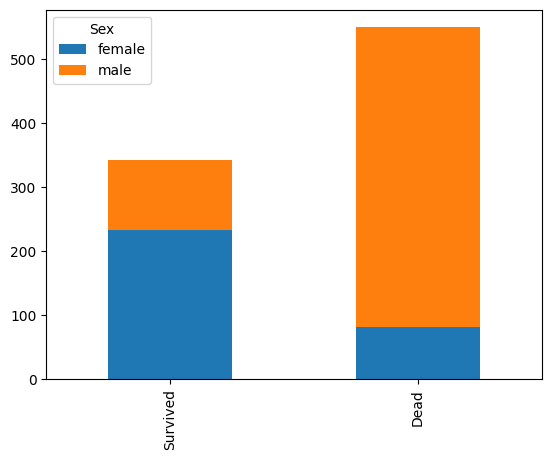

Sex       female  male
Survived     233   109
Dead          81   468


In [ ]:
## Number of survivors by gender
survived = dataset[dataset["Survived"] == 1]["Sex"].value_counts()
print(survived)

## Number of deceased by gender
dead = dataset[dataset["Survived"] == 0]["Sex"].value_counts()
print(dead)

## Number of gender
gender = dataset["Sex"].value_counts()
print(gender)

## Based on the feature variable, a table or graph showing the number of survivors and deaths is displayed.
show_bar("Sex")

**Distribution Graph**

The graph shows the age distribution by gender, displaying the ages of male and female passengers in the Titanic dataset.

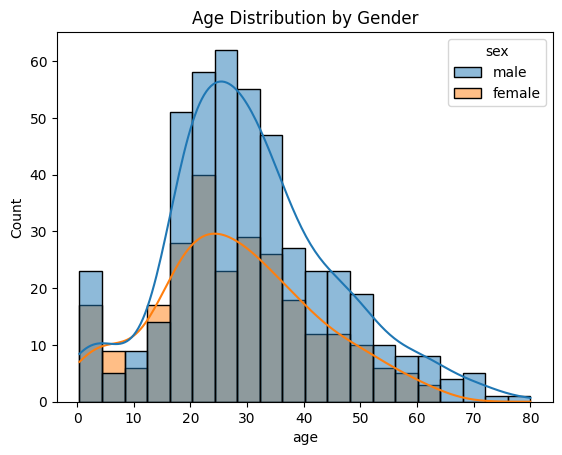

In [ ]:
##distribution of ages
data = sns.load_dataset("titanic")
sns.histplot(data = data, x='age', kde=True, hue='sex')
plt.title("Age Distribution by Gender")
plt.show()

**Clustered Bar Chart**

The graph shows the survival rate based on passenger class (Pclass) and gender, illustrating how survival varied among male and female passengers in different classes.

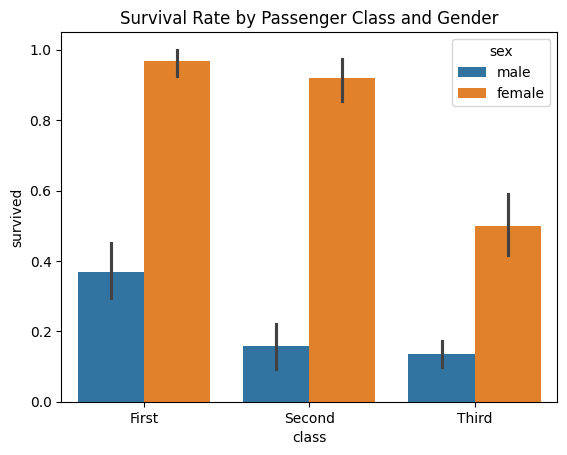

In [ ]:
##distribution of class and gender
sns.barplot(data=data, x='class', y='survived',hue='sex') ##barplot, countplot, boxplot
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()
##print(dataset)

# **Handling Dataset Attributes**

**Delete Unncessary attributes in table**

The reason is that the performance of the AI model is not good when unncessary attributes are included.

We delete attributes such as Ticket, Cabin, and Name that do not influence the survival rate.

**Reason**

- Ticket

The ticket content for one person does not overlap with that of others and shows no discernible pattern.

1) Lack of correlation with survival

2) Uniqueness and lack of pattern

3) Avoiding the curse of dimensionality

- Cabin

The cabin information is largely missing in the data.

1) Lack of logical connection

2) Insufficient explanation of direct impact

- Name

The name information does not have specific features that influence the survival attribute.

1) Irrelevance

2) Risk of Overfitting

3) Hinders Generalization

In [ ]:
## Delete unnecessary attributes in table
dataset.drop("Ticket", axis=1, inplace=True)
dataset.drop("Cabin", axis=1, inplace=True)
dataset.drop("Name", axis=1, inplace=True)

print(dataset.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


**Data Simplification**

This step simplifies the values of 'Sex' and 'Embarked' in the dataset. In other words, we convert the values in the 'Sex' and 'Embarked' attributes to a numerical format.

**Sex**

0 - Female

1 - Male

**Embarked**

S (Soutampton - UK) : 0

C (Cherbourg - France) : 1

Q (Queenstown - Ireland) : 2



In [ ]:
## Female - 0 / Male - 1
m = {"female": 0, "male": 1}
dataset["Sex"] = dataset["Sex"].map(m)

## S - 0 / C - 1 / Q - 2
m = {"S": 0, "C": 1, "Q": 2}
dataset["Embarked"] = dataset["Embarked"].map(m)

print(dataset.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500       0.0
1            2         1       1    0  38.0      1      0  71.2833       1.0
2            3         1       3    0  26.0      0      0   7.9250       0.0
3            4         1       1    0  35.0      1      0  53.1000       0.0
4            5         0       3    1  35.0      0      0   8.0500       0.0


**Handling missing value of 'Age' in database**

We found that missing value of age atttributes, we input the average of age in the blank.

**Reason**

1) Prevent Data Loss

-> Avoid discarding rows with missing values.

2) Ensure completeness

-> Many algorithms require complete data to function properly.

3) Improve model accuracy

-> Filling missing values helps keep all data for better predictions.

4) Maintain consistency

-> Ensure the age attribute is present for all records, making analysis smoother

In [ ]:
## Handling missing values
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].mean())
dataset.dropna(inplace=True)
dataset.info()
##print(dataset)

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 69.5 KB


# **Why is the accuracy of the model important?**

1) Performance Measurement

Accuracy is a straightforward metric to assess how well the model is predicting.

2) Model Evaluation

High accuracy indicates good model performance, while low accuracy suggests the model might not generalize well to new data.

3) Model Comparsion

Accuracy is often used to compare the performance of different models.

4) Optimization Goal

In many machine learning tasks, maximizing accuray is the primarly objective during training

5) Impact on Decision-Making

Models with high accuracy make better predicitions, leading to better decision-making

# **Prediction Model**

# 1. LinearRegression

Linear Regression is a technique used to model the relationship between variables with a straight line, allowing us to predict one variable based on another.




**1) We set two independent variables.**

Independent Variable : SibSp, Parch

Dependent Variable : Survived

In [ ]:
##predict - use LinearRegression()
##Independent Variable : SibSp, Parch / Dependent Variable : Survived
data = pd.DataFrame({
    'Survived': dataset['Survived'],
    'SibSp': dataset['SibSp'],
    'Parch': dataset['Parch']
})
X = data[['SibSp','Parch']]
y = data['Survived']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Perform prediction on the test data & Predict on test data
y_pred = model.predict(X_test)

# Print the results
#print("Predicted values:", y_pred)
#print("Actual values:", y_test.values)

**Model Accuracy Evalution**

In [ ]:
# Assuming Y_pred contains continuous values from a regression model
y_pred_classified = (y_pred >= 0.5).astype(int)

# Now compute the accuracy
accuracy = accuracy_score(y_test, y_pred_classified)
print(f"Linear Regression Accuracy: {accuracy * 100:.2f}%")

Linear Regression Accuracy: 62.92%


**Prediction of the Survival of Passengers.**

Based on the SibSp and Parch attributes, you can see the predicted survival rates for new passengers using a Linear Regression model.

In [ ]:
##predict new passenger
new_passenger = pd.DataFrame({'SibSp': [0],'Parch': [0]})
new_passenger2 = pd.DataFrame({'SibSp': [1],'Parch': [1]})
new_passenger3 = pd.DataFrame({'SibSp': [1],'Parch': [0]})
new_passenger4 = pd.DataFrame({'SibSp': [0],'Parch': [1]})
y_pred = model.predict(X_test)
##print(y_pred)
##print(y_test.values)
##print(len(y_pred))
##print(len(y_test.values))
predict_survived = model.predict(new_passenger)
print(predict_survived)
predict_survived2 = model.predict(new_passenger2)
print(predict_survived2)
predict_survived3 = model.predict(new_passenger3)
print(predict_survived3)
predict_survived4 = model.predict(new_passenger4)
print(predict_survived4)

[0.37954473]
[0.4046653]
[0.3329128]
[0.45129723]


**2) We set six independent variables**

Independent Variable : Pclass, Sex, Age, SibSp, Parch, Fare

Dependent Variable : Survived

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

**Model Accurancy Evalution**

In [ ]:
# Assuming Y_pred contains continuous values from a regression model
y_pred_classified = (y_pred >= 0.5).astype(int)

# Now compute the accuracy
accuracy = accuracy_score(y_test, y_pred_classified)
print(f"Linear Regression Accuracy: {accuracy * 100:.2f}%")

Linear Regression Accuracy: 80.34%


**Prediction of the Survival of Passengers.**

Based on the Pclass, Sex, Age, SibSp, Parch, Fare attributes, you can see the predicted survival rates for new passengers using a Linear Regression model.

In [ ]:
##predict new passenger
new_passenger = pd.DataFrame({'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[0],
'Parch':[1],
'Fare':[7.25]})
new_passenger2 = pd.DataFrame({'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[1],
'Fare':[7.25]})
new_passenger3 = pd.DataFrame({'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[0],
'Parch':[0],
'Fare':[7.25]})
new_passenger4 = pd.DataFrame({'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[7.25]})
y_pred = model.predict(X_test)

predict_survived = model.predict(new_passenger)
print(predict_survived)
predict_survived2 = model.predict(new_passenger2)
print(predict_survived2)
predict_survived3 = model.predict(new_passenger3)
print(predict_survived3)
predict_survived4 = model.predict(new_passenger4)
print(predict_survived4)

[0.50549486]
[0.45760237]
[0.52242687]
[0.47453438]


# 2. Decision Tree

**Decision Tree Algorithm**

A machine learning method that classifies or predicts data using a tree structure by splitting it based on specific features.

**DecisionTreeClassifier**

A model that applies the Decision Tree algorithm to classify data into different categories, offering easy interpretability but is prone to overfitting.


**1) We set two independent variables.**

Independent Variable : SibSp, Parch

Dependent Variable : Survived

In [ ]:
##predict - Decision Tree
##Independent Variable : SibSp, Parch / Dependent Variable : Survived
data = pd.DataFrame({
    'Survived': dataset['Survived'],
    'SibSp': dataset['SibSp'],
    'Parch': dataset['Parch']
})
X = data[['SibSp','Parch']]
Y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

**Model Accuracy Evalution**

In [ ]:
# Assuming Y_pred contains continuous values from a regression model
y_pred_classified = (y_pred >= 0.5).astype(int)

#Accuracy
accuracy = accuracy_score(y_test, y_pred_classified)
print(f"Decision Tree Classifer Accuracy: {accuracy * 100:.2f}%")

Decision Tree Classifer Accuracy: 66.29%


**Prediction of the Survival of Passengers.**

Based on the SibSp and Parch attributes, you can see the predicted survival rates for new passengers using a Decision Tree Classifer model.

In [ ]:
#Predict new Passenger
new_passenger = pd.DataFrame({'SibSp': [0], 'Parch': [0]})
new_passenger2 = pd.DataFrame({'SibSp': [1], 'Parch': [1]})
new_passenger3 = pd.DataFrame({'SibSp': [1], 'Parch': [0]})
new_passenger4 = pd.DataFrame({'SibSp': [0], 'Parch': [1]})

##passenger
#Predict the survival of a new passenger - survived : 1 / Dead : 0
clf_prediction = clf.predict(new_passenger)
print(clf_prediction)

#Survival probability
clf_prob = clf.predict_proba(new_passenger)
print(clf_prob) ## Dead probability - 0.68997669 / Survived probability - 0.31002331

##passenger2
#predict
clf_prediction2 = clf.predict(new_passenger2)
print(clf_prediction2)

#Survival probability
clf_prob2 = clf.predict_proba(new_passenger2)
print(clf_prob2)

##passenger3
#pedict
clf_prediction3 = clf.predict(new_passenger3)
print(clf_prediction3)

#Survival probability
clf_prob3 = clf.predict_proba(new_passenger3)
print(clf_prob3)


##passenger4
#pedict
clf_prediction4 = clf.predict(new_passenger4)
print(clf_prediction4)

#Survival probability
clf_prob4 = clf.predict_proba(new_passenger4)
print(clf_prob4)


[0]
[[0.68997669 0.31002331]]
[1]
[[0.35714286 0.64285714]]
[0]
[[0.5 0.5]]
[1]
[[0.34615385 0.65384615]]


**2) We set six independent variables**

Independent Variable : Pclass, Sex, Age, SibSp, Parch, Fare

Dependent Variable : Survived

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

**Model Accuracy Evalution**

In [ ]:
# Assuming Y_pred contains continuous values from a regression model
y_pred_classified = (y_pred >= 0.5).astype(int)

# Now compute the accuracy
accuracy = accuracy_score(y_test, y_pred_classified)
print(f"Decision Tree Classifer Accuracy: {accuracy * 100:.2f}%")

Decision Tree Classifer Accuracy: 76.40%


**Prediction of the Survival of Passengers.**

Based on the Pclass, Sex, Age, SibSp, Parch, Fare attributes, you can see the predicted survival rates for new passengers using a Decision Tree Classifer model.

In [ ]:
##predict new passenger
new_passenger = pd.DataFrame({'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[0],
'Parch':[1],
'Fare':[7.25]})
new_passenger2 = pd.DataFrame({'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[1],
'Fare':[7.25]})
new_passenger3 = pd.DataFrame({'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[0],
'Parch':[0],
'Fare':[7.25]})
new_passenger4 = pd.DataFrame({'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[7.25]})


##passenger
#Predict the survival of a new passenger
clf_prediction = clf.predict(new_passenger)
print(clf_prediction)

clf_prob = clf.predict_proba(new_passenger)
print(clf_prob)

##passenger2
#predict
clf_prediction2 = clf.predict(new_passenger2)
print(clf_prediction2)

clf_prob2 = clf.predict_proba(new_passenger2)
print(clf_prob2)

##passenger3
#pedict
clf_prediction3 = clf.predict(new_passenger3)
print(clf_prediction3)

clf_prob3 = clf.predict_proba(new_passenger3)
print(clf_prob3)


##passenger4
#pedict
clf_prediction4 = clf.predict(new_passenger4)
print(clf_prediction4)

clf_prob4 = clf.predict_proba(new_passenger4)
print(clf_prob4)

[0]
[[1. 0.]]
[0]
[[1. 0.]]
[0]
[[1. 0.]]
[0]
[[1. 0.]]


# 3. Logistic Regression

Logistic Regression is a statistical method used for binary classification problems, predicting the probability that an event occurs (0 or 1) by modeling the relationship between input variables and the output using a logistic function.


**1) We set two independent variables.**

Independent Variable : SibSp, Parch

Dependent Variable : Survived

In [ ]:
#Viewing of columns in Dataset
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['SibSp', 'Parch']]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and training logistic regression model

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Predict on test data
y_pred = logreg.predict(X_test)

**Model Accuracy Evalution**

In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 62.92%


**Prediction of the Survival of Passengers.**

Based on the SibSp and Parch attributes, you can see the predicted survival rates for new passengers using a Logistic Regression model.

In [ ]:
#example of new data for prediction

new_data = pd.DataFrame({
'SibSp':[0],
'Parch':[1]
})

new_data2 = pd.DataFrame({
'SibSp':[1],
'Parch':[1]
})

new_data3 = pd.DataFrame({
'SibSp':[0],
'Parch':[0]
})

new_data4 = pd.DataFrame({
'SibSp':[1],
'Parch':[0]
})

#make predictions

new_prediction = logreg.predict(new_data)
print("Survival prediction for New Data:",new_prediction)
new_prediction_prob = logreg.predict_proba(new_data)
print("Survival prediction for New Data:",new_prediction_prob)


new_prediction2 = logreg.predict(new_data2)
print("Survival prediction for New Data2:",new_prediction2)
new_prediction_prob2 = logreg.predict_proba(new_data2)
print("Survival prediction for New Data2:",new_prediction_prob2)

new_prediction3 = logreg.predict(new_data3)
print("Survival prediction for New Data3:",new_prediction3)
new_prediction_prob3 = logreg.predict_proba(new_data3)
print("Survival prediction for New Data3:",new_prediction_prob3)

new_prediction4 = logreg.predict(new_data4)
print("Survival prediction for New Data4:",new_prediction4)
new_prediction_prob4 = logreg.predict_proba(new_data4)
print("Survival prediction for New Data4:",new_prediction_prob4)

Survival prediction for New Data: [0]
Survival prediction for New Data: [[0.54789554 0.45210446]]
Survival prediction for New Data2: [0]
Survival prediction for New Data2: [[0.59874351 0.40125649]]
Survival prediction for New Data3: [0]
Survival prediction for New Data3: [[0.62001265 0.37998735]]
Survival prediction for New Data4: [0]
Survival prediction for New Data4: [[0.66766942 0.33233058]]


**2) We set six independent variables**

Independent Variable : Pclass, Sex, Age, SibSp, Parch, Fare

Dependent Variable : Survived

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and training logistic regression model

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Predict on test data
y_pred = logreg.predict(X_test)

**Model Accuracy Evalution**

In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 79.21%


**Prediction of the Survival of Passengers.**

Based on the Pclass, Sex, Age, SibSp, Parch, Fare attributes, you can see the predicted survival rates for new passengers using a Logistic Regression model.

In [ ]:
#example of new data for prediction

new_data = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[0],
'Parch':[1],
'Fare':[7.25]

})

new_data2 = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[1],
'Fare':[7.25]

})

new_data3 = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[0],
'Parch':[0],
'Fare':[7.25]

})

new_data4 = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[7.25]

})

#make predictions

new_prediction = logreg.predict(new_data)
print("Survival prediction for New Data:",new_prediction)
new_prediction_prob = logreg.predict_proba(new_data)
print("Survival prediction for New Data:",new_prediction_prob)


new_prediction2 = logreg.predict(new_data2)
print("Survival prediction for New Data2:",new_prediction2)
new_prediction_prob2 = logreg.predict_proba(new_data2)
print("Survival prediction for New Data2:",new_prediction_prob2)

new_prediction3 = logreg.predict(new_data3)
print("Survival prediction for New Data3:",new_prediction3)
new_prediction_prob3 = logreg.predict_proba(new_data3)
print("Survival prediction for New Data3:",new_prediction_prob3)

new_prediction4 = logreg.predict(new_data4)
print("Survival prediction for New Data4:",new_prediction4)
new_prediction_prob4 = logreg.predict_proba(new_data4)
print("Survival prediction for New Data4:",new_prediction_prob4)

Survival prediction for New Data: [1]
Survival prediction for New Data: [[0.41765749 0.58234251]]
Survival prediction for New Data2: [0]
Survival prediction for New Data2: [[0.51739797 0.48260203]]
Survival prediction for New Data3: [1]
Survival prediction for New Data3: [[0.39586928 0.60413072]]
Survival prediction for New Data4: [1]
Survival prediction for New Data4: [[0.49482782 0.50517218]]


**New data for prediction - logistic regression**

In [ ]:
#example of new data for prediction

new_data = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[7.25]

})

#make predictions

new_prediction = logreg.predict(new_data)
print("Survival prediction for New Data:",new_prediction)

Survival prediction for New Data: [1]


In [ ]:
#example of new data for prediction

new_data = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[7.25]

})

#make predictions

new_prediction = logreg.predict(new_data)
print("Survival prediction for New Data:",new_prediction)

#example of new data for prediction

new_data = pd.DataFrame({
'Pclass':[1],
'Sex':[0],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[71.2833]

})

#make predictions

new_prediction = logreg.predict(new_data)
print("Survival prediction for New Data:",new_prediction)

Survival prediction for New Data: [1]
Survival prediction for New Data: [1]


# 4. Random Forest Algorithm
Random Forest Algorithm is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting by averaging their predictions for regression tasks or using majority voting for classification tasks.


**1) We set two independent variables.**

Independent Variable : SibSp, Parch

Dependent Variable : Survived

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['SibSp', 'Parch']]

In [ ]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train the Random Forest Model
#initializing the random class clasifier
rf_Classifier = RandomForestClassifier (n_estimators=100, random_state=42)
rf_Classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# making predictions with a trained machine learning model, specifically a random forest classifier (rf_Classifier)
y_pred = rf_Classifier.predict(X_test)
print(y_pred)
print(len(y_pred))

[0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1]
178


**Model Accuracy Evalution**

In [ ]:
#calculate and display the accuracy of a trained Random Forest model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 66.29%


**Prediction of the Survival of Passengers.**

Based on the SibSp and Parch attributes, you can see the predicted survival rates for new passengers using a Random Forest model.

In [ ]:
new_data = pd.DataFrame({
'SibSp':[0],
'Parch':[1]
})

new_data2 = pd.DataFrame({
'SibSp':[1],
'Parch':[1]
})

new_data3 = pd.DataFrame({
'SibSp':[0],
'Parch':[0]
})

new_data4 = pd.DataFrame({
'SibSp':[1],
'Parch':[0]
})


#make predictions

new_prediction = rf_Classifier.predict(new_data)
print("Survival prediction for New Data:",new_prediction)
new_prediction_prob = rf_Classifier.predict_proba(new_data)
print("Survival prediction for New Data:",new_prediction_prob)


new_prediction2 = rf_Classifier.predict(new_data2)
print("Survival prediction for New Data2:",new_prediction2)
new_prediction_prob2 = rf_Classifier.predict_proba(new_data2)
print("Survival prediction for New Data2:",new_prediction_prob2)

new_prediction3 = rf_Classifier.predict(new_data3)
print("Survival prediction for New Data3:",new_prediction3)
new_prediction_prob3 = rf_Classifier.predict_proba(new_data3)
print("Survival prediction for New Data3:",new_prediction_prob3)

new_prediction4 = rf_Classifier.predict(new_data4)
print("Survival prediction for New Data4:",new_prediction4)
new_prediction_prob4 = rf_Classifier.predict_proba(new_data4)
print("Survival prediction for New Data4:",new_prediction_prob4)

Survival prediction for New Data: [1]
Survival prediction for New Data: [[0.3403844 0.6596156]]
Survival prediction for New Data2: [1]
Survival prediction for New Data2: [[0.35310859 0.64689141]]
Survival prediction for New Data3: [0]
Survival prediction for New Data3: [[0.69164888 0.30835112]]
Survival prediction for New Data4: [0]
Survival prediction for New Data4: [[0.50594546 0.49405454]]


**2) We set six independent variables**

Independent Variable : Pclass, Sex, Age, SibSp, Parch, Fare

Dependent Variable : Survived

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [ ]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train the Random Forest Model
#initializing the random class clasifier
rf_Classifier = RandomForestClassifier (n_estimators=100, random_state=42)
rf_Classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# making predictions with a trained machine learning model, specifically a random forest classifier (rf_Classifier)
y_pred = rf_Classifier.predict(X_test)
print(y_pred)
print(len(y_pred))

[0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1]
178


**Model Accuracy Evalution**

In [ ]:
#calculate and display the accuracy of a trained Random Forest model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 77.53%


**Prediction of the Survival of Passengers.**

Based on the Pclass, Sex, Age, SibSp, Parch, Fare attributes, you can see the predicted survival rates for new passengers using a Random Forest model.

In [ ]:
new_data = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[0],
'Parch':[1],
'Fare':[7.25]

})

new_data2 = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[1],
'Fare':[7.25]

})

new_data3 = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[0],
'Parch':[0],
'Fare':[7.25]

})

new_data4 = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[7.25]

})


#make predictions

new_prediction = rf_Classifier.predict(new_data)
print("Survival prediction for New Data:",new_prediction)
new_prediction_prob = rf_Classifier.predict_proba(new_data)
print("Survival prediction for New Data:",new_prediction_prob)


new_prediction2 = rf_Classifier.predict(new_data2)
print("Survival prediction for New Data2:",new_prediction2)
new_prediction_prob2 = rf_Classifier.predict_proba(new_data2)
print("Survival prediction for New Data2:",new_prediction_prob2)

new_prediction3 = rf_Classifier.predict(new_data3)
print("Survival prediction for New Data3:",new_prediction3)
new_prediction_prob3 = rf_Classifier.predict_proba(new_data3)
print("Survival prediction for New Data3:",new_prediction_prob3)

new_prediction4 = rf_Classifier.predict(new_data4)
print("Survival prediction for New Data4:",new_prediction4)
new_prediction_prob4 = rf_Classifier.predict_proba(new_data4)
print("Survival prediction for New Data4:",new_prediction_prob4)

Survival prediction for New Data: [0]
Survival prediction for New Data: [[0.86 0.14]]
Survival prediction for New Data2: [0]
Survival prediction for New Data2: [[0.81 0.19]]
Survival prediction for New Data3: [0]
Survival prediction for New Data3: [[0.91 0.09]]
Survival prediction for New Data4: [0]
Survival prediction for New Data4: [[0.9 0.1]]


# 5. K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a non-parametric machine learning algorithm used for classification and regression tasks, which classifies a data point based on the majority class of its k closest neighbors in the feature space, typically measured by distance metrics like Euclidean distance.


**1) We set two independent variables.**

Independent Variable : SibSp, Parch

Dependent Variable : Survived

In [ ]:
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[[ 'SibSp', 'Parch']]

In [ ]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
##train the K-Nearest Neighbors Model
#initializing the random class clasifier
KNN_best = KNeighborsClassifier(n_neighbors=7)
KNN_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# making predictions with a trained machine learning model, specifically a K-Nearest Neighbors classifier (rf_Classifier)

y_pred = KNN_best.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

**Model Accuracy Evalution**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy * 100:.2f}%")

K-Nearest Neighbors Accuracy: 65.73%


**Prediction of the Survival of Passengers.**

Based on the SibSp and Parch attributes, you can see the predicted survival rates for new passengers using a KNN model.

In [ ]:
new_data = pd.DataFrame({
'SibSp':[0],
'Parch':[1]
})

new_data2 = pd.DataFrame({
'SibSp':[1],
'Parch':[1]
})

new_data3 = pd.DataFrame({
'SibSp':[0],
'Parch':[0]
})

new_data4 = pd.DataFrame({
'SibSp':[1],
'Parch':[0]
})


#make predictions

new_prediction = KNN_best.predict(new_data)
print("Survival prediction for New Data:",new_prediction)
new_prediction_prob = KNN_best.predict_proba(new_data)
print("Survival prediction for New Data:",new_prediction_prob)


new_prediction2 = KNN_best.predict(new_data2)
print("Survival prediction for New Data2:",new_prediction2)
new_prediction_prob2 = KNN_best.predict_proba(new_data2)
print("Survival prediction for New Data2:",new_prediction_prob2)

new_prediction3 = KNN_best.predict(new_data3)
print("Survival prediction for New Data3:",new_prediction3)
new_prediction_prob3 = KNN_best.predict_proba(new_data3)
print("Survival prediction for New Data3:",new_prediction_prob3)

new_prediction4 = KNN_best.predict(new_data4)
print("Survival prediction for New Data4:",new_prediction4)
new_prediction_prob4 = KNN_best.predict_proba(new_data4)
print("Survival prediction for New Data4:",new_prediction_prob4)

Survival prediction for New Data: [1]
Survival prediction for New Data: [[0.42857143 0.57142857]]
Survival prediction for New Data2: [1]
Survival prediction for New Data2: [[0.42857143 0.57142857]]
Survival prediction for New Data3: [0]
Survival prediction for New Data3: [[0.85714286 0.14285714]]
Survival prediction for New Data4: [0]
Survival prediction for New Data4: [[0.57142857 0.42857143]]


**2) We set six independent variables**

Independent Variable : Pclass, Sex, Age, SibSp, Parch, Fare

Dependent Variable : Survived

In [ ]:
KNeighborsClassifier()


KNeighborsClassifier()

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [ ]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
##train the K-Nearest Neighbors Model
#initializing the random class clasifier
KNN_best = KNeighborsClassifier(n_neighbors=7)
KNN_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# making predictions with a trained machine learning model, specifically a K-Nearest Neighbors classifier (rf_Classifier)

y_pred = KNN_best.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1])

**Model Accuracy Evalution**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy * 100:.2f}%")

K-Nearest Neighbors Accuracy: 70.79%


**Prediction of the Survival of Passengers.**

Based on the Pclass, Sex, Age, SibSp, Parch, Fare attributes, you can see the predicted survival rates for new passengers using a KNN model.

In [ ]:
new_data = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[0],
'Parch':[1],
'Fare':[7.25]

})

new_data2 = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[1],
'Fare':[7.25]

})

new_data3 = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[0],
'Parch':[0],
'Fare':[7.25]

})

new_data4 = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[7.25]

})


#make predictions

new_prediction = KNN_best.predict(new_data)
print("Survival prediction for New Data:",new_prediction)
new_prediction_prob = KNN_best.predict_proba(new_data)
print("Survival prediction for New Data:",new_prediction_prob)


new_prediction2 = KNN_best.predict(new_data2)
print("Survival prediction for New Data2:",new_prediction2)
new_prediction_prob2 = KNN_best.predict_proba(new_data2)
print("Survival prediction for New Data2:",new_prediction_prob2)

new_prediction3 = KNN_best.predict(new_data3)
print("Survival prediction for New Data3:",new_prediction3)
new_prediction_prob3 = KNN_best.predict_proba(new_data3)
print("Survival prediction for New Data3:",new_prediction_prob3)

new_prediction4 = KNN_best.predict(new_data4)
print("Survival prediction for New Data4:",new_prediction4)
new_prediction_prob4 = KNN_best.predict_proba(new_data4)
print("Survival prediction for New Data4:",new_prediction_prob4)

Survival prediction for New Data: [0]
Survival prediction for New Data: [[1. 0.]]
Survival prediction for New Data2: [0]
Survival prediction for New Data2: [[1. 0.]]
Survival prediction for New Data3: [0]
Survival prediction for New Data3: [[1. 0.]]
Survival prediction for New Data4: [0]
Survival prediction for New Data4: [[1. 0.]]


# **Hyperparameter Tuning**

**Grid-Search**

 Grid Search is a technique used to improve a model's accuracy by systematically searching for the optimal combination of hyperparameters.

**Random-Search**

Random Search is a hyperparameter optimization technique that randomly selects combinations of hyperparameters from predefined ranges and evaluates the model's performance.

**We set six independent variables**

Independent Variable : Pclass, Sex, Age, SibSp, Parch, Fare

Dependent Variable : Survived

# 1. LogisticRegression

- LogisticRegression - grid-search


In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

**We set the variables before applying Grid search.**

**Description**

1) The meaning of "C"

- "C" determines the strength of regularization.

- A larger C means weaker regularization, and a smaller C means stronger regularization.

2) The meaning of "L1" and "L2"

- L1 (Lasso): It keeps only the important features and can make the coefficients of other features zero. This effectively “removes” unnecessary features.

- L2 (Ridge): It uses all features but shrinks the value of large coefficients to prevent overfitting.

In [ ]:
# Define the parameter grid
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [ ]:
# Create GridSearchCV
clf = GridSearchCV(logreg, grid, cv=10)

# Fit the model
best_clf = clf.fit(X_train, y_train)

# Get the best estimator
print(best_clf.best_estimator_)

LogisticRegression(C=0.1, max_iter=1000)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

**Model Accuracy Evalution**

In [ ]:
y_pred = best_clf.predict(X_test)

#calculate and display the accuracy of a trained Random Forest model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Grid Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Grid Logistic Regression Accuracy: 80.34%


- LogisticRegression - Random search

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression(max_iter=1000)

**We set the variables before applying Random search.**

**Description**

1) The meaning of "C"

- "C" controls the regularization strength.

2) The meaning of "Penalty"

- "Penalty" specifies the type of regularization applied.

3) The meaning of "Solver"

- "Solver" determines the optimization algorithm used to minimize the loss function.

In [ ]:
# Define the parameter distributions
param_distributions = {
    'C': np.logspace(-4, 4, 50),           # Regularization strength (logarithmic scale)
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['saga', 'liblinear', 'lbfgs'],  # Optimization algorithm
    'max_iter': [100, 200, 500, 1000]      # Maximum number of iterations
}

In [ ]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_distributions,
    n_iter=50,              # Number of random samples
    scoring='accuracy',     # Metric for evaluation
    cv=5,                   # Cross-validation folds
    verbose=2,              # Output progress
    random_state=42,        # Ensure reproducibility
    n_jobs=-1               # Use all available processors
)

In [ ]:
random_clf = random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
165 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

**Model Accuracy Evalution**

In [ ]:
y_pred = random_clf.predict(X_test)

#calculate and display the accuracy of a trained Random Forest model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Random Logistic Regression Accuracy: 79.21%


- LogisticRegression - Original version

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and training logistic regression model

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Predict on test data
y_pred = logreg.predict(X_test)

**Model Accuracy Evalution**

In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 79.21%


**Prediction of the Survival of Passengers.**

We compare the prediction values from the original version with those from Grid search version and Random search version.

In [ ]:
#example of new data for prediction

new_data = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[7.25]
})

#make predictions - grid

new_prediction = best_clf.predict(new_data)
print("grid: Survival prediction for New Data:",new_prediction)
new_prediction_prob = best_clf.predict_proba(new_data)
print("grid: Survival prediction for New Data:",new_prediction_prob)

##make predictions - random
new_prediction = random_clf.predict(new_data)
print("random: Survival prediction for New Data:",new_prediction)
new_prediction_prob = random_clf.predict_proba(new_data)
print("random: Survival prediction for New Data:",new_prediction_prob)

#make predictions - logist
new_prediction = logreg.predict(new_data)
print("Survival prediction for New Data:",new_prediction)
new_prediction_prob = logreg.predict_proba(new_data)
print("Survival prediction for New Data:",new_prediction_prob)


grid: Survival prediction for New Data: [0]
grid: Survival prediction for New Data: [[0.52090086 0.47909914]]
random: Survival prediction for New Data: [0]
random: Survival prediction for New Data: [[0.50517694 0.49482306]]
Survival prediction for New Data: [1]
Survival prediction for New Data: [[0.49482782 0.50517218]]


# 2. Random Forest Algorithm

- Random Forest Algorithm - grid-search

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train the Random Forest Model
#initializing the random class clasifier
rf_Classifier = RandomForestClassifier (n_estimators=100, random_state=42)
rf_Classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**We set the variables before applying Grid search.**

**Description**

1) The meaning of "n_estimators"

- This defines the number of trees in the forest

2) The meaning of "max_features"

- This adjusts the number of features used for splits to test its impact on model performance.

3) The meaning of "max_depth"

- This adjusts the depth of the trees to prevent overfitting or underfitting.

4) The meaning of "Criterion"

- This defines the function used to measure the quality of a split.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
# Create GridSearchCV
clf = GridSearchCV(rf_Classifier, param_grid, cv=10)

# Fit the model
best_clf = clf.fit(X_train, y_train)

# Get the best estimator
print(best_clf.best_estimator_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=42)


**Model Accuracy Evalution**

In [ ]:
y_pred = best_clf.predict(X_test)

#calculate and display the accuracy of a trained Random Forest model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Grid-Search Random Forest Accuracy: {accuracy * 100:.2f}%")

Grid-Search Random Forest Accuracy: 78.65%


- Random Forest Algorithm - Random Search

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train the Random Forest Model
#initializing the random class clasifier
rf_Classifier = RandomForestClassifier (n_estimators=100, random_state=42)

**We set the variables before applying Random search.**

**Description**

1) The meaning of "n_estimators"

- This specifies the number of trees in the forest.

2) The meaning of "max_depth"

- This sets the maximum depth of each tree.

3) The meaning of "min_samples_split"

- This specifies the minimum number of samples required in a leaf node.

4) The meaning of "max_features"

- This determines the number of features considered for the best split.

In [ ]:
# Define the parameter distributions
param_distributions = {
    'n_estimators': [50, 100, 200, 500],              # Number of trees
    'max_depth': [None, 10, 20, 30, 50],              # Maximum depth
    'min_samples_split': [2, 5, 10],                  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                    # Minimum samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],         # Features considered for split
    'bootstrap': [True, False],                       # Bootstrap sampling
    'criterion': ['gini', 'entropy']                  # Split quality metric
}


In [ ]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_Classifier,
    param_distributions=param_distributions,
    n_iter=50,             # Number of random combinations
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',    # Evaluation metric
    verbose=2,
    random_state=42,
    n_jobs=-1              # Use all available processors
)

In [ ]:
# Fit the model
random_clf = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
110 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

**Model Accuracy Evalution**

In [ ]:
y_pred = random_clf.predict(X_test)

#calculate and display the accuracy of a trained Random Forest model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Random-Search Random Forest Accuracy: {accuracy * 100:.2f}%")

Random-Search Random Forest Accuracy: 78.65%


 - Random Forest Algorithm - Original version

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [ ]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#train the Random Forest Model
#initializing the random class clasifier
rf_Classifier = RandomForestClassifier (n_estimators=100, random_state=42)
rf_Classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# making predictions with a trained machine learning model, specifically a random forest classifier (rf_Classifier)
y_pred = rf_Classifier.predict(X_test)
print(y_pred)
print(len(y_pred))

[0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1]
178


**Model Accuracy Evalution**

In [ ]:
#calculate and display the accuracy of a trained Random Forest model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 77.53%


**Prediction of the Survival of Passengers.**

We compare the prediction values from the original version with those from Grid search version and Random search version.

In [ ]:
#example of new data for prediction

new_data = pd.DataFrame({
'Pclass':[1],
'Sex':[0],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[71.2833]

})

#make predictions - grid

new_prediction = best_clf.predict(new_data)
print("grid: Survival prediction for New Data:",new_prediction)
new_prediction_prob = best_clf.predict_proba(new_data)
print("grid: Survival prediction for New Data:",new_prediction_prob)

##make predictions - random
new_prediction = random_clf.predict(new_data)
print("random: Survival prediction for New Data:",new_prediction)
new_prediction_prob = random_clf.predict_proba(new_data)
print("random: Survival prediction for New Data:",new_prediction_prob)

#make predictions - random
new_prediction = rf_Classifier.predict(new_data)
print("Survival prediction for New Data:",new_prediction)
new_prediction_prob = rf_Classifier.predict_proba(new_data)
print("Survival prediction for New Data:",new_prediction_prob)

grid: Survival prediction for New Data: [1]
grid: Survival prediction for New Data: [[0.01942716 0.98057284]]
random: Survival prediction for New Data: [1]
random: Survival prediction for New Data: [[0. 1.]]
Survival prediction for New Data: [1]
Survival prediction for New Data: [[0. 1.]]


# 3. K-Nearest Neighbors

- KKN - Grid-search

In [ ]:
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [ ]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
##train the K-Nearest Neighbors Model
#initializing the random class clasifier
KNN_best = KNeighborsClassifier(n_neighbors=7)
KNN_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# making predictions with a trained machine learning model, specifically a K-Nearest Neighbors classifier (rf_Classifier)

y_pred = KNN_best.predict(X_test)
##y_pred

**We set the variables before applying Grid search.**

**Description**

1) The meaning of " n_neighbors"

- This adjusts the number of neighbors (k) to optimize model performance.

2) The meaning of "weights"

- This determines the weight method for neighbors.

3) The meaning of "metric"

- This defines the distance calculation method.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # The value of k (number of neighbors to consider)
    'weights': ['uniform', 'distance'],  # The weighting method for neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski']  # The method for distance calculation
}


In [ ]:
# Create GridSearchCV
clf = GridSearchCV(KNN_best, param_grid, cv=10)

# Fit the model
best_clf = clf.fit(X_train, y_train)

# Get the best estimator
print(best_clf.best_estimator_)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**Model Accuracy Evalution**

In [ ]:
y_pred = best_clf.predict(X_test)

#calculate and display the accuracy of a trained Random Forest model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Grid-Search KNN Regression Accuracy: {accuracy * 100:.2f}%")

Grid-Search KNN Regression Accuracy: 75.28%


- KNN - Random-search

In [ ]:
knn = KNeighborsClassifier()

**We set the variables before applying Random search.**

**Description**

1) The meaning of "n_neighbors"

- This controls the number of neighbors to be used in the K-Nearest Neighbors (KNN) algorithm.

2) The meaning of "weights"

- This defines the weight function used to calculate the importance of each neighbor.

3) The meaning of "metric"

- This specifies the distance metric used to calculate the distance between data points.

In [ ]:
# Define the parameter distributions
param_distributions = {
    'n_neighbors': np.arange(1, 30),                 # Number of neighbors
    'weights': ['uniform', 'distance'],             # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'p': [1, 2, 3]                                  # Power parameter for Minkowski
}

In [ ]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_distributions,
    n_iter=50,             # Number of random combinations
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',    # Evaluation metric
    random_state=42,
    n_jobs=-1              # Use all available processors
)


In [ ]:
# Fit the model
random_clf = random_search.fit(X_train, y_train)

**Model Accuracy Evalution**

In [ ]:
y_pred = random_clf.predict(X_test)

#calculate and display the accuracy of a trained Random Forest model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Random-Search KNN Regression Accuracy: {accuracy * 100:.2f}%")

Random-Search KNN Regression Accuracy: 74.16%


- K-Nearest Neighbors (KNN) - Original version

In [ ]:
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [ ]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
##train the K-Nearest Neighbors Model
#initializing the random class clasifier
KNN_best = KNeighborsClassifier(n_neighbors=7)
KNN_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# making predictions with a trained machine learning model, specifically a K-Nearest Neighbors classifier (rf_Classifier)

y_pred = KNN_best.predict(X_test)
##y_pred

**Model Accuracy Evalution**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy * 100:.2f}%")

K-Nearest Neighbors Accuracy: 70.79%


**Prediction of the Survival of Passengers.**

We compare the prediction values from the original version with those from Grid search version and Random search version.

In [ ]:
#example of new data for prediction

new_data = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[7.25]
})

#make predictions - grid

new_prediction = best_clf.predict(new_data)
print("grid: Survival prediction for New Data:",new_prediction)
new_prediction_prob = best_clf.predict_proba(new_data)
print("grid: Survival prediction for New Data:",new_prediction_prob)

##make predictions - random
new_prediction = random_clf.predict(new_data)
print("random: Survival prediction for New Data:",new_prediction)
new_prediction_prob = random_clf.predict_proba(new_data)
print("random: Survival prediction for New Data:",new_prediction_prob)

#make predictions - KNN
new_prediction = KNN_best.predict(new_data)
print("Survival prediction for New Data:",new_prediction)
new_prediction_prob = KNN_best.predict_proba(new_data)
print("Survival prediction for New Data:",new_prediction_prob)

grid: Survival prediction for New Data: [0]
grid: Survival prediction for New Data: [[1. 0.]]
random: Survival prediction for New Data: [0]
random: Survival prediction for New Data: [[0.79324498 0.20675502]]
Survival prediction for New Data: [0]
Survival prediction for New Data: [[1. 0.]]


# 4. LinearRegression

- LinearRegression - Grid Search

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**We set the variables before applying Grid search.**

**Description**

1) The meaning of "alpha"

- This defines the regularization strength.

2) The meaning of "solver"

-  This defines the optimization algorithm used to fit the model.


In [ ]:
# Create the model
ridge = Ridge()

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Optimization algorithm
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Evaluation metric: Mean Squared Error (MSE)
    verbose=2
)

# Fit to the training data
best_clf = grid_search.fit(X_train, y_train)

# Get the best estimator
print(best_clf.best_estimator_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END .........................alpha=0.1, solver=cholesky; total time=   0.0s
[CV] END .........................alpha=0.1, so

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................alpha=0.1, solver=sag; total time=   0.1s
[CV] END ..............................alpha=0.1, solver=sag; total time=   0.1s
[CV] END ..............................alpha=0.1, solver=sag; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............................alpha=0.1, solver=saga; total time=   0.1s
[CV] END .............................alpha=0.1, solver=saga; total time=   0.1s
[CV] END .............................alpha=0.1, solver=saga; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............................alpha=0.1, solver=saga; total time=   0.1s
[CV] END .............................alpha=0.1, solver=saga; total time=   0.1s
[CV] END .............................alpha=1.0, solver=auto; total time=   0.0s
[CV] END .............................alpha=1.0, solver=auto; total time=   0.0s
[CV] END .............................alpha=1.0, solver=auto; total time=   0.0s
[CV] END .............................alpha=1.0, solver=auto; total time=   0.0s
[CV] END .............................alpha=1.0, solver=auto; total time=   0.0s
[CV] END ..............................alpha=1.0, solver=svd; total time=   0.0s
[CV] END ..............................alpha=1.0, solver=svd; total time=   0.0s
[CV] END ..............................alpha=1.0, solver=svd; total time=   0.0s
[CV] END ..............................alpha=1.0, solver=svd; total time=   0.0s
[CV] END ..............................alpha=1.0, solver=svd; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............................alpha=1.0, solver=lsqr; total time=   0.0s
[CV] END .............................alpha=1.0, solver=lsqr; total time=   0.0s
[CV] END .............................alpha=1.0, solver=lsqr; total time=   0.0s
[CV] END .............................alpha=1.0, solver=lsqr; total time=   0.0s
[CV] END .............................alpha=1.0, solver=lsqr; total time=   0.0s
[CV] END ........................alpha=1.0, solver=sparse_cg; total time=   0.0s
[CV] END ........................alpha=1.0, solver=sparse_cg; total time=   0.0s
[CV] END ........................alpha=1.0, solver=sparse_cg; total time=   0.0s
[CV] END ........................alpha=1.0, solver=sparse_cg; total time=   0.0s
[CV] END ........................alpha=1.0, solver=sparse_cg; total time=   0.0s
[CV] END ..............................alpha=1.0, solver=sag; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................alpha=1.0, solver=sag; total time=   0.1s
[CV] END ..............................alpha=1.0, solver=sag; total time=   0.1s
[CV] END ..............................alpha=1.0, solver=sag; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............................alpha=1.0, solver=sag; total time=   0.1s
[CV] END .............................alpha=1.0, solver=saga; total time=   0.1s
[CV] END .............................alpha=1.0, solver=saga; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............................alpha=1.0, solver=saga; total time=   0.1s
[CV] END .............................alpha=1.0, solver=saga; total time=   0.1s
[CV] END .............................alpha=1.0, solver=saga; total time=   0.1s
[CV] END ............................alpha=10.0, solver=auto; total time=   0.0s
[CV] END ............................alpha=10.0, solver=auto; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............................alpha=10.0, solver=auto; total time=   0.0s
[CV] END ............................alpha=10.0, solver=auto; total time=   0.0s
[CV] END ............................alpha=10.0, solver=auto; total time=   0.0s
[CV] END .............................alpha=10.0, solver=svd; total time=   0.0s
[CV] END .............................alpha=10.0, solver=svd; total time=   0.0s
[CV] END .............................alpha=10.0, solver=svd; total time=   0.0s
[CV] END .............................alpha=10.0, solver=svd; total time=   0.0s
[CV] END .............................alpha=10.0, solver=svd; total time=   0.0s
[CV] END ........................alpha=10.0, solver=cholesky; total time=   0.0s
[CV] END ........................alpha=10.0, solver=cholesky; total time=   0.0s
[CV] END ........................alpha=10.0, solver=cholesky; total time=   0.0s
[CV] END ........................alpha=10.0, solver=cholesky; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............................alpha=10.0, solver=sag; total time=   0.1s
[CV] END .............................alpha=10.0, solver=sag; total time=   0.1s
[CV] END .............................alpha=10.0, solver=sag; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............................alpha=10.0, solver=saga; total time=   0.1s
[CV] END ............................alpha=10.0, solver=saga; total time=   0.1s
[CV] END ............................alpha=10.0, solver=saga; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............................alpha=10.0, solver=saga; total time=   0.1s
[CV] END ............................alpha=10.0, solver=saga; total time=   0.1s
[CV] END ...........................alpha=100.0, solver=auto; total time=   0.0s
[CV] END ...........................alpha=100.0, solver=auto; total time=   0.0s
[CV] END ...........................alpha=100.0, solver=auto; total time=   0.0s
[CV] END ...........................alpha=100.0, solver=auto; total time=   0.0s
[CV] END ...........................alpha=100.0, solver=auto; total time=   0.0s
[CV] END ............................alpha=100.0, solver=svd; total time=   0.0s
[CV] END ............................alpha=100.0, solver=svd; total time=   0.0s
[CV] END ............................alpha=100.0, solver=svd; total time=   0.0s
[CV] END ............................alpha=100.0, solver=svd; total time=   0.0s
[CV] END ............................alpha=100.0, solver=svd; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................alpha=100.0, solver=cholesky; total time=   0.0s
[CV] END .......................alpha=100.0, solver=cholesky; total time=   0.0s
[CV] END .......................alpha=100.0, solver=cholesky; total time=   0.0s
[CV] END .......................alpha=100.0, solver=cholesky; total time=   0.0s
[CV] END ...........................alpha=100.0, solver=lsqr; total time=   0.0s
[CV] END ...........................alpha=100.0, solver=lsqr; total time=   0.0s
[CV] END ...........................alpha=100.0, solver=lsqr; total time=   0.0s
[CV] END ...........................alpha=100.0, solver=lsqr; total time=   0.0s
[CV] END ...........................alpha=100.0, solver=lsqr; total time=   0.0s
[CV] END ......................alpha=100.0, solver=sparse_cg; total time=   0.0s
[CV] END ......................alpha=100.0, solver=sparse_cg; total time=   0.0s
[CV] END ......................alpha=100.0, solver=sparse_cg; total time=   0.0s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ............................alpha=100.0, solver=sag; total time=   0.1s
[CV] END ............................alpha=100.0, solver=sag; total time=   0.1s
[CV] END ............................alpha=100.0, solver=sag; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........................alpha=100.0, solver=saga; total time=   0.1s
[CV] END ...........................alpha=100.0, solver=saga; total time=   0.1s
[CV] END ...........................alpha=100.0, solver=saga; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........................alpha=100.0, solver=saga; total time=   0.1s
[CV] END ...........................alpha=100.0, solver=saga; total time=   0.1s
Ridge(solver='lsqr')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Model Accuracy Evalution**

In [ ]:
y_pred = best_clf.predict(X_test)

# Assuming Y_pred contains continuous values from a regression model
y_pred_classified = (y_pred >= 0.5).astype(int)

# Now compute the accuracy
accuracy = accuracy_score(y_test, y_pred_classified)
print(f"Grid-Search Linear Regression Accuracy: {accuracy * 100:.2f}%")

Grid-Search Linear Regression Accuracy: 80.34%


- LinearRegression - Random search

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Create the Ridge model
ridge = Ridge()

**We set the variables before applying Random search.**

**Description**

1) The meaning of "alpha"

- This refers to the regularization strength.

2) The meaning of "fit_intercept"

- This determines whether the model should include an intercept (bias term) when fitting the model.


In [ ]:
# Define the parameter distributions
param_distributions = {
    'alpha': np.logspace(-6, 6, 13),  # Regularization strength (log scale)
    'fit_intercept': [True, False],   # Whether to include intercept
}

In [ ]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_distributions,
    n_iter=50,             # Number of random combinations
    cv=5,                  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Evaluation metric
    random_state=42,
    n_jobs=-1              # Use all available processors
)

In [ ]:
# Fit the model
random_clf = random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 26 is smaller than n_iter=50. Running 26 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


**Model Accuracy Evalution**

In [ ]:
y_pred = random_clf.predict(X_test)

# Assuming Y_pred contains continuous values from a regression model
y_pred_classified = (y_pred >= 0.5).astype(int)

# Now compute the accuracy
accuracy = accuracy_score(y_test, y_pred_classified)
print(f"Random-Search Linear Regression Accuracy: {accuracy * 100:.2f}%")

Random-Search Linear Regression Accuracy: 80.34%


- LinearRegression

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

**Model Accuracny Evalution**

In [ ]:
# Assuming Y_pred contains continuous values from a regression model
y_pred_classified = (y_pred >= 0.5).astype(int)

# Now compute the accuracy
accuracy = accuracy_score(y_test, y_pred_classified)
print(f"Linear Regression Accuracy: {accuracy * 100:.2f}%")

Linear Regression Accuracy: 80.34%


**Prediction of the Survival of Passengers.**

We compare the prediction values from the original version with those from Grid search version and Random search version.

In [ ]:
#example of new data for prediction

new_data = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[7.25]
})

#make predictions - grid
new_prediction = best_clf.predict(new_data)
print("grid: Survival prediction for New Data:",new_prediction)

#make predictions - Random
new_prediction = random_clf.predict(new_data)
print("random: Survival prediction for New Data:",new_prediction)

#make predictions - Linear
new_prediction = model.predict(new_data)
print("Survival prediction for New Data:",new_prediction)

grid: Survival prediction for New Data: [0.47473454]
random: Survival prediction for New Data: [0.47473447]
Survival prediction for New Data: [0.47453438]


# 5. Decision Tree

- Decision Tree - grid search

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

**We set the variables before applying Grid search.**

**Description**

1) The meaning of "criterion"

- This defines the split quality function

2) The meaning of "max_depth"

- This sets the minimum number of samples required to split an internal node.

3) The meaning of " min_samples_leaf"

- This defines the minimum number of samples.

4) The meaning of "max_features"

- This specifies the number of features to consider when making the best split.

In [ ]:
# Create the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],              # Split quality function
    'max_depth': [3, 5, 10, None],                 # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],               # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                 # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']         # Features considered for the best split
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                        # 5-fold cross-validation
    scoring='accuracy',          # Evaluation metric
    verbose=2,                   # Print progress
    n_jobs=-1                    # Use all available processors
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
print(best_clf.best_estimator_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Ridge(solver='lsqr')


In [ ]:
y_pred = best_clf.predict(X_test)

**Model Accuracy Evalution**

In [ ]:
# Assuming Y_pred contains continuous values from a regression model
y_pred_classified = (y_pred >= 0.5).astype(int)

# Now compute the accuracy
accuracy = accuracy_score(y_test, y_pred_classified)
print(f"Grid-Search Decision Tree Accuracy: {accuracy * 100:.2f}%")

Grid-Search Decision Tree Accuracy: 80.34%


- Decision Tree - Random Search

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
# Create the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

**We set the variables before applying Random search.**

**Description**

1) The meaning of "max_depth"

- This controls the maximum depth of the decision tree.

2) The meaning of "min_sample_split"

- This defines the minimum number of samples required to split an internal node.

3) The meaning of "min_samples_leaf"

- This specifies the minimum number of samples required to be a leaf node.

4) The meaning of "criterion"

- This specifies the function to measure the quality of a split.

In [ ]:
# Define the parameter distributions
param_distributions = {
    'max_depth': [None, 10, 20, 30, 40, 50],         # Depth of the tree
    'min_samples_split': [2, 5, 10, 20],             # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4, 10],               # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],        # Number of features to consider
    'criterion': ['gini', 'entropy'],               # Split quality criterion
    'splitter': ['best', 'random'],                 # Split strategy
}

In [ ]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions,
    n_iter=100,                    # Number of random combinations to try
    cv=5,                          # 5-fold cross-validation
    scoring='accuracy',            # Accuracy metric for classification
    random_state=42,
    n_jobs=-1                       # Use all available processors
)

In [ ]:
# Fit the model
random_clf = random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
130 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

**Model Accuracy Evalution**

In [ ]:
y_pred = random_clf.predict(X_test)

#calculate and display the accuracy of a trained Random Forest model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Random-Search Decision Tree Accuracy: {accuracy * 100:.2f}%")

Random-Search Decision Tree Accuracy: 76.97%


- Decision Tree - Orignal version

In [ ]:
#preparing data for a machine learning model, specifically for predicting survival on the Titanic
y= dataset['Survived']
X= dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

**Model Accuracy Evalution**

In [ ]:
# Assuming Y_pred contains continuous values from a regression model
y_pred_classified = (y_pred >= 0.5).astype(int)

# Now compute the accuracy
accuracy = accuracy_score(y_test, y_pred_classified)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

Decision Tree Accuracy: 76.40%


**Prediction of the Survival of Passengers.**

We compare the prediction values from the original version with those from Grid search version and Random search version.Passenger

In [ ]:
#example of new data for prediction

new_data = pd.DataFrame({
'Pclass':[1],
'Sex':[1],
'Age':[22],
'SibSp':[1],
'Parch':[0],
'Fare':[7.25]
})

#make predictions - grid

new_prediction = best_clf.predict(new_data)
print("grid: Survival prediction for New Data:",new_prediction)

#make predictions - Random
new_prediction = random_clf.predict(new_data)
print("random: Survival prediction for New Data:",new_prediction)

#make predictions - Linear
new_prediction = clf.predict(new_data)
print("Survival prediction for New Data:",new_prediction)

grid: Survival prediction for New Data: [0.47473454]
random: Survival prediction for New Data: [0]
Survival prediction for New Data: [0]


# **The Future Study**

1. **Neural Network Models**

**Neural Network Models** are algorithms used in artifical intelligence (AI) and machine learning that mimic the human brain to process data and recognize patterns.

-> Through the models, we will gain a high quality survival rate.


2. **Feature Importance**

**Feature Importance** refers to the technique used in machine learning to determine the relative contribution of each feature (or attribute) in making predictions or decisions.

-> The method helps to delete unncessary attributes, making  the process of passenger prediction simple.

3. **Ensemble Methods**

**Ensemble Methods** are techniques in machine learning that combine multiple individual models (also known as base models or weak learners) to create a stronger, more robust model.

-> The method helps fix the errors of the previous model, leading to more accurate predictions.


